In [12]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Import the chunked data that was generated by notebook parsing.ipynb.

In [3]:
all = []
for i in range(1,6):
    fname = f'data/chunk{i}.json'

    with open(fname) as f:
        data = json.load(f)
        all += data

print(len(all))

5005


In [6]:
sequences = [x['prop_chords'] for x in all]
len(sequences)

5005

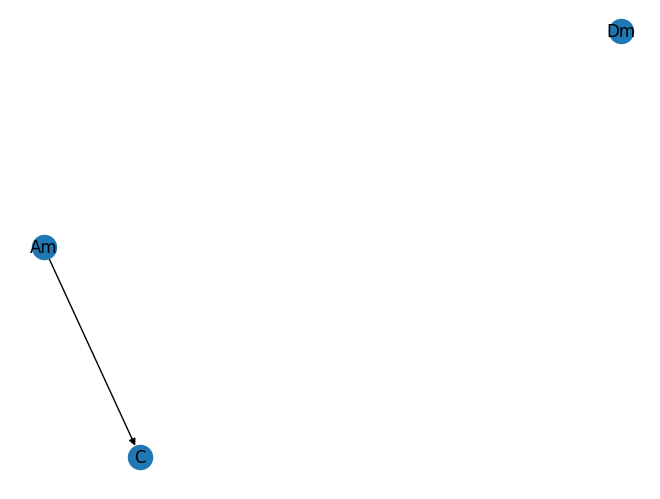

In [18]:
DG = nx.DiGraph()

DG.add_nodes_from(['Am','C','Dm'])
DG.add_node('Am')
DG.add_edge('Am','C')
DG.add_edge('Am','C')
DG.edge
nx.draw(DG, with_labels=True)
plt.show()

In [22]:
# We will import collections to create an ordered dictionary which is required for a graph implementation.
from typing import List

def get_bigrams(l):
    """Returns a list of bigrams from a list."""
    return [(l[i], l[i+1]) for i in range(len(l)-1)]

all_bigrams = []
all_chords = []
for song in sequences:
    bigrams = get_bigrams(song)
    all_bigrams += bigrams
    all_chords += song

print(len(all_bigrams))


148552


In [24]:
from collections import Counter

bigram_count = Counter(all_bigrams)
print("Most common bigrams:")
print(bigram_count.most_common(10))

unigram_count = Counter(all_chords)
print("Most common chords")
print(unigram_count.most_common(10))

Most common bigrams:
[(('C', 'G'), 6194), (('G', 'D'), 5260), (('G', 'C'), 4373), (('D', 'G'), 3974), (('F', 'C'), 3399), (('Em', 'C'), 2460), (('G', 'Am'), 2441), (('D', 'A'), 2353), (('C', 'D'), 2242), (('Am', 'F'), 2189)]
Most common chords
[('G', 24677), ('C', 19595), ('D', 16853), ('Em', 10359), ('Am', 10156), ('A', 9462), ('F', 9253), ('E', 5746), ('Bm', 4326), ('Dm', 3286)]


In [33]:
len(unigram_count)

850

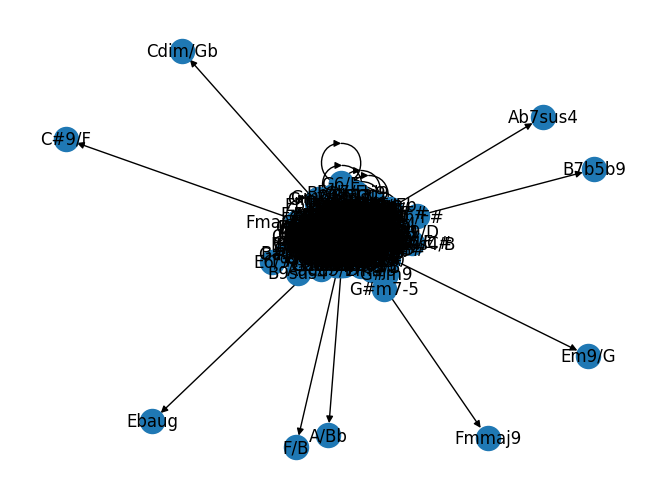

In [32]:
DG = nx.DiGraph()

for edge in all_bigrams:
    DG.add_edge(edge[0], edge[1], weight=bigram_count[edge])

nx.draw(DG, with_labels=True)
plt.show()

Trim down the graph to include only chords that appear more than `n` times. This will remove some more specific chords.

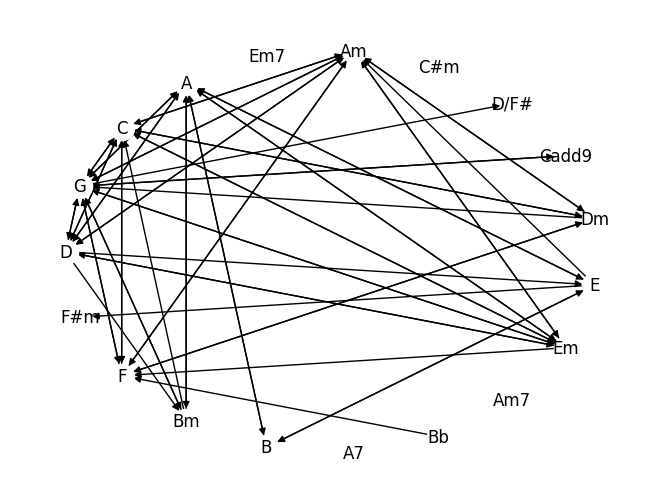

In [80]:
node_filter = 900
DG_trim = DG.subgraph([x for x in DG.nodes if unigram_count[x] > node_filter])

edge_filter = 400
sg = nx.subgraph_view(DG_trim, filter_edge= lambda u, v: bigram_count[u, v] > edge_filter and u != v)
nx.draw_shell(sg, with_labels=True, node_color='w')

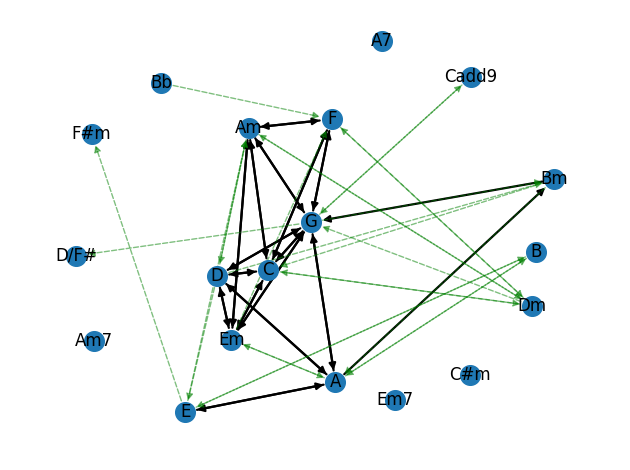

In [96]:
edge_threshold = 800

elarge = [(u, v) for (u, v, d) in sg.edges(data=True) if d["weight"] > edge_threshold]
esmall = [(u, v) for (u, v, d) in sg.edges(data=True) if d["weight"] <= edge_threshold]

pos = nx.spring_layout(sg, k=20, pos={'C':(0,0)}, fixed=['C'], seed=236)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(sg, pos, node_size=200)

# edges
nx.draw_networkx_edges(sg, pos, edgelist=elarge, width=1.6)
nx.draw_networkx_edges(
    sg, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="g", style="dashed"
)

# node labels
nx.draw_networkx_labels(sg, pos, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(sg, "weight")
#nx.draw_networkx_edge_labels(sg, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()